***WATER POTABILITY PREDICTION_BY SADAF SHAHEEN, HABIBA MEHMOOD AND AGHA HAMMAD AHMED***

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [37]:
pd.reset_option('all')

C:\Users\user\AppData\Local\Temp\ipykernel_7048\2786130087.py:1: FutureWarning:

data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.

C:\Users\user\AppData\Local\Temp\ipykernel_7048\2786130087.py:1: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



**IMPORTING DATASET**

In [38]:
data = pd.read_csv('water.csv')

***7 QUESTIONS TO UNDERSTAND DATA***

In [39]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [40]:
data.tail(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


**Q1: How big `is` the data?**

In [41]:
data.shape

(3276, 10)

***Q2: How does the data look like?***

In [42]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


***Q3: What is the data type of the columns?***

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


***Q4: Are there any missing values in the dataset?***

In [44]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

***Q5: How does the data look statistically?***


In [45]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


***Q6:Are there any duplicate values?***

In [46]:
data.duplicated().sum()

0

***Q7 : What are the relationships between variables?***

In [47]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


**HISTOGRAM REPRESENTATION**

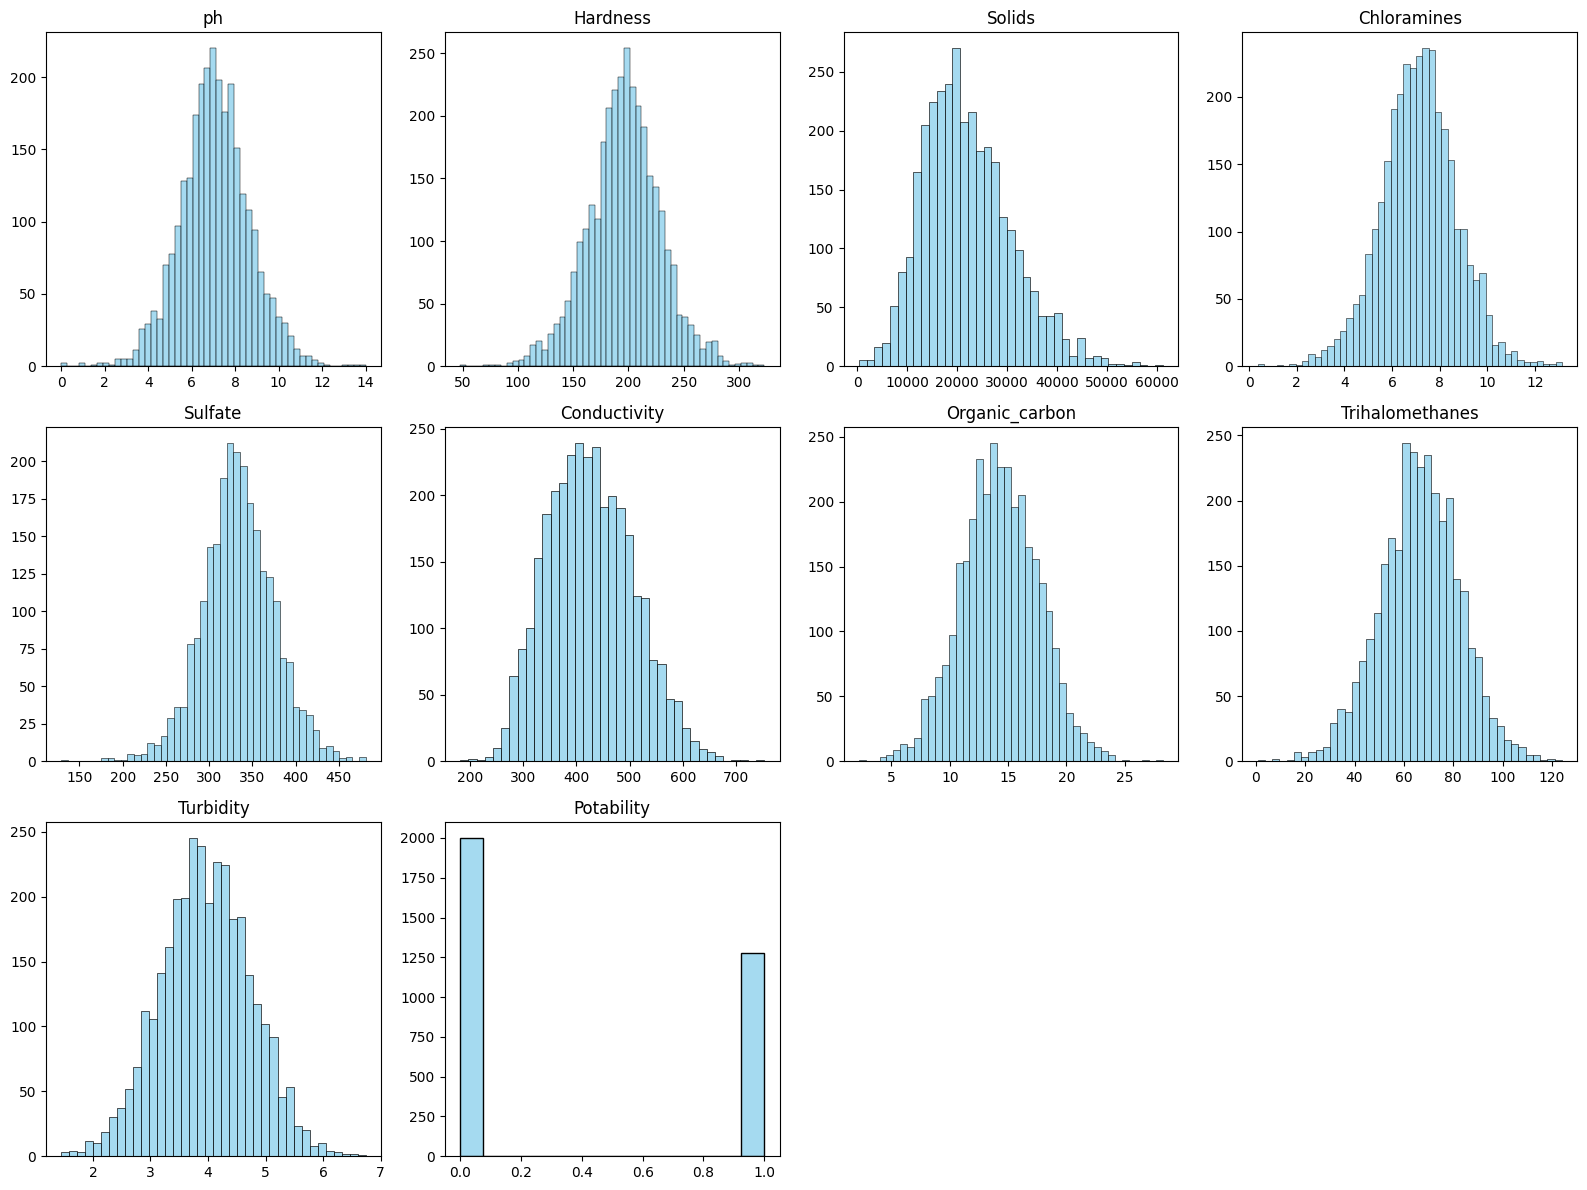

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
             'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


num_features = len(features)


num_cols = 4


num_rows = (num_features + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

axes = axes.flatten()


for i, feature in enumerate(features):
    sns.histplot(data[feature], ax=axes[i], kde=False, color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


**CHECKING FOR MISSING VALUES - VISUALIZATION**

<Axes: >

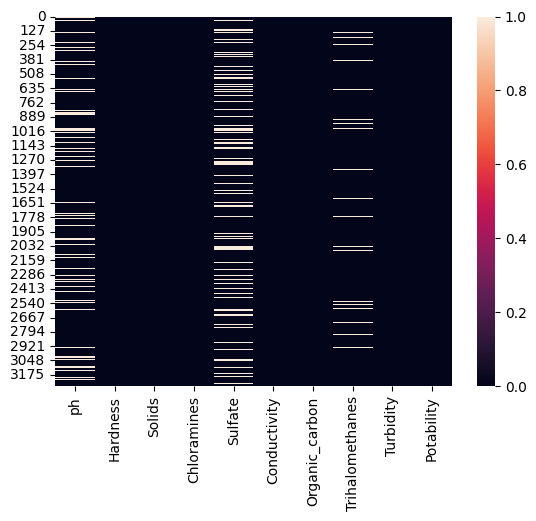

In [49]:
sns.heatmap(data.isnull())

**CHECKING CORRELATION VISUALLY**

<Axes: >

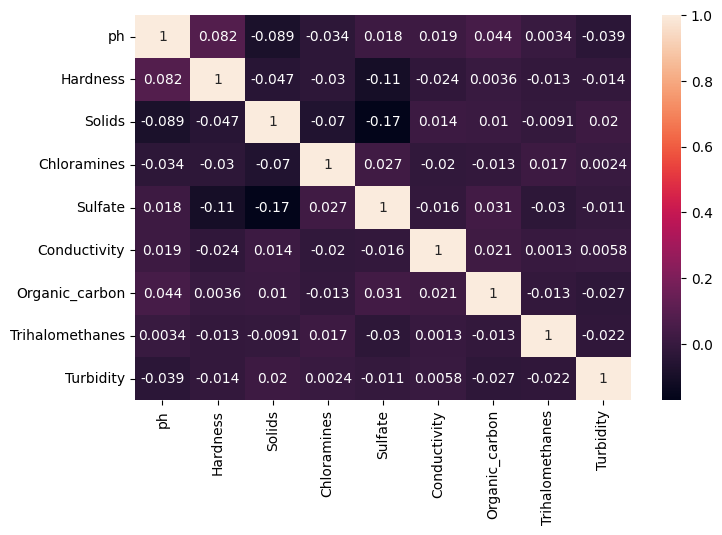

In [50]:
x=data.drop(columns=['Potability'])
plt.figure(figsize=(8,5))
sns.heatmap(x.corr(),annot=True)

In [51]:
data["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

// CHECKING FOR OUTLIERS - VISUALIZATION

In [52]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
ax=ax.flatten()

index=0

for col, values in data.items():
  sns.boxplot(y=col,data=data,ax=ax[index])
  index +=1

**Checking the dir/strength of correlated feautres**


In [18]:
fig=px.scatter(data, x="Trihalomethanes",y="ph",color = "Potability",template="plotly_dark")
fig.show()

In [19]:
data.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**BASIC 7 QUESTIONS WITH VISUALIZATION DONE ABOVE UPTIL HERE !**


In [20]:
pip install -U feature-engine

**SPLITTING**

In [21]:
from sklearn.model_selection import train_test_split
data1 = data.drop('Potability', axis=1)

In [22]:
X = data.drop('Potability', axis =1)
Y = data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

In [23]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(2293, 9) (983, 9) (2293,) (983,)


In [24]:
X_train.isnull().sum()

ph                 343
Hardness             0
Solids               0
Chloramines          0
Sulfate            540
Conductivity         0
Organic_carbon       0
Trihalomethanes    117
Turbidity            0
dtype: int64

In [25]:
!pip install --upgrade scikit-learn

C:\Users\user\AppData\Local\Temp\ipykernel_7048\821423091.py:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\user\AppData\Local\Temp\ipykernel_7048\821423091.py:21: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\user\AppData\Local\Temp\ipykernel_7048\821423091.py:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\user\AppData\Local\Temp\ipykernel_7048\821423091.py:21: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\user\AppData\Local\Temp\ipykernel_7048\821423091.py:20: FutureWarning:



`shade` is now deprecated

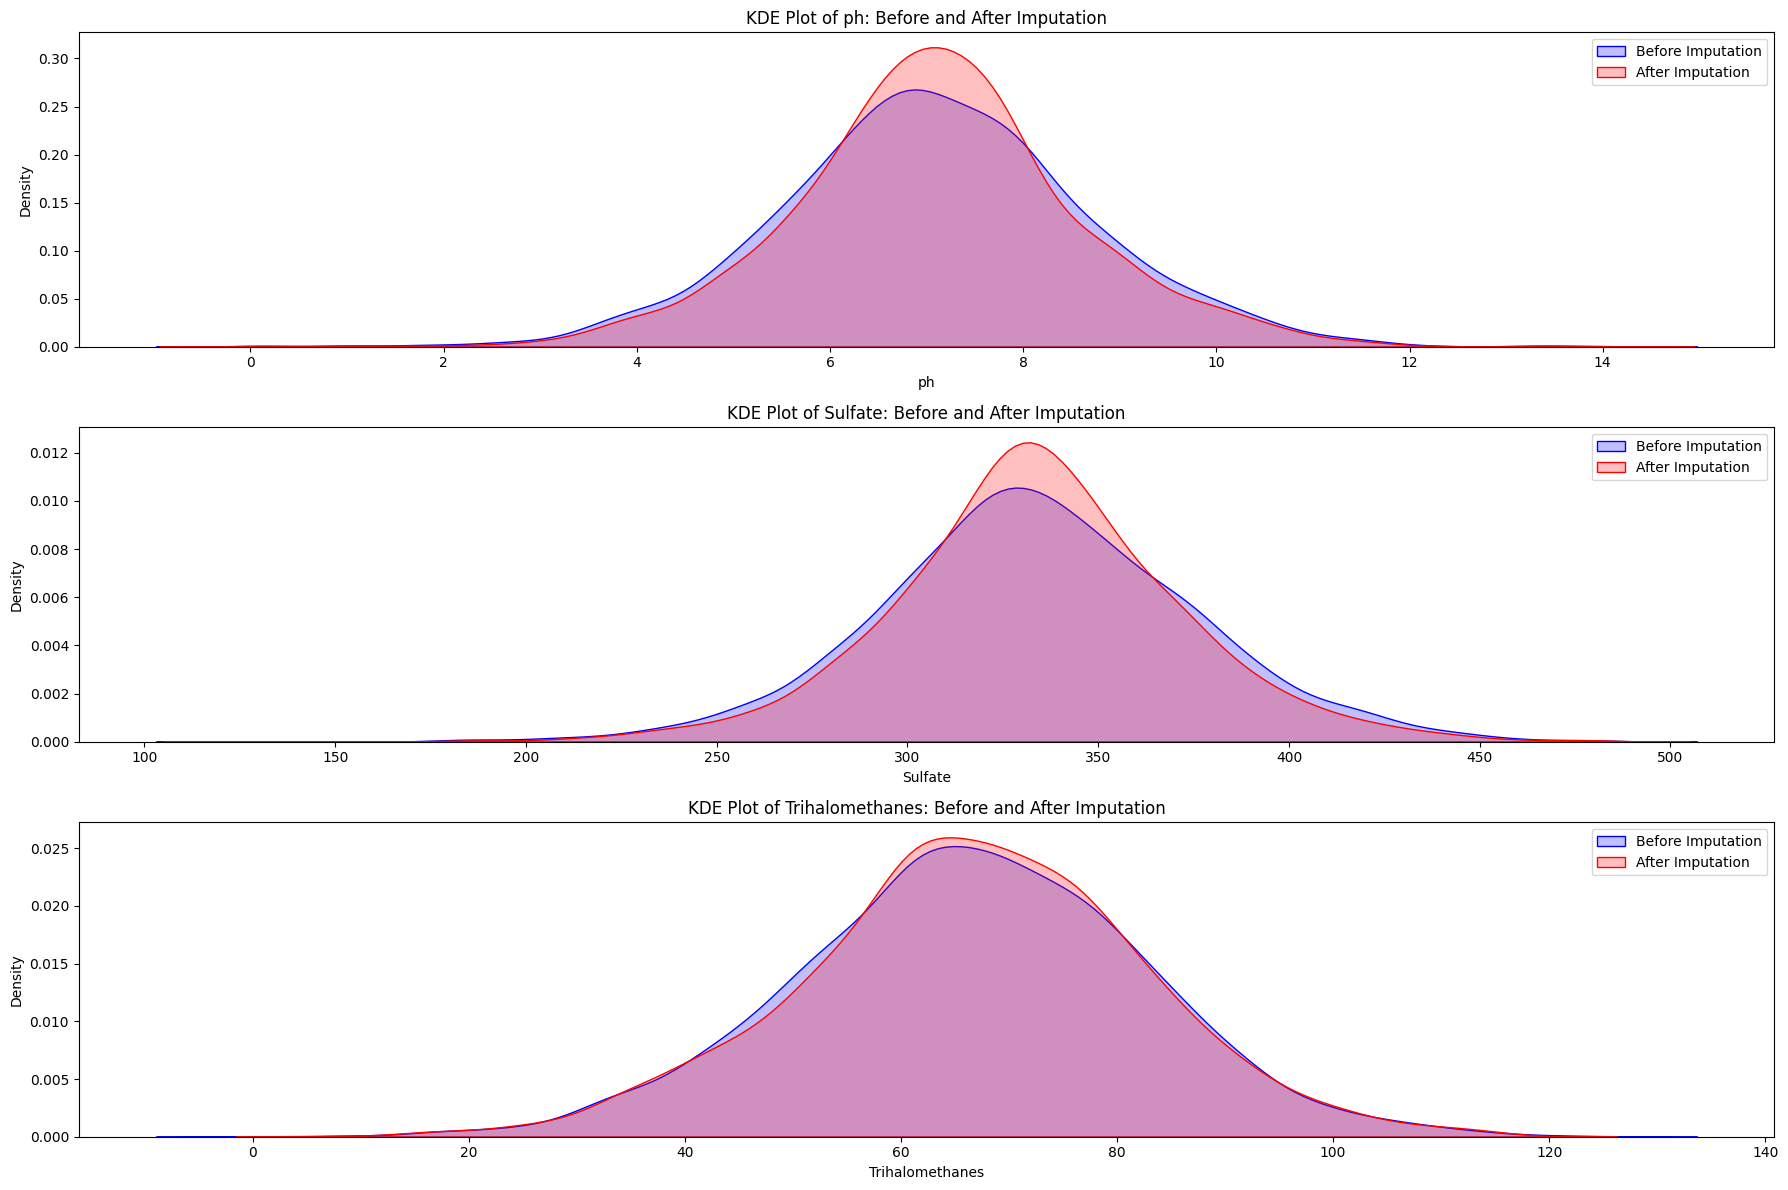

In [26]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=5)
X_train_new = knn_imputer.fit_transform(X_train)
X_test_new = knn_imputer.transform(X_test)

# Convert the numpy arrays back to DataFrames
X_train_new = pd.DataFrame(X_train_new, columns=X.columns)
X_test_new = pd.DataFrame(X_test_new, columns=X.columns)


columns_to_plot = ['ph', 'Sulfate', 'Trihalomethanes']


plt.figure(figsize=(18, 12))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 1, i)
    sns.kdeplot(X[col].dropna(), color='blue', label='Before Imputation', shade=True)
    sns.kdeplot(X_train_new[col], color='red', label='After Imputation', shade=True)
    plt.title(f'KDE Plot of {col}: Before and After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


In [27]:
X_train_new.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

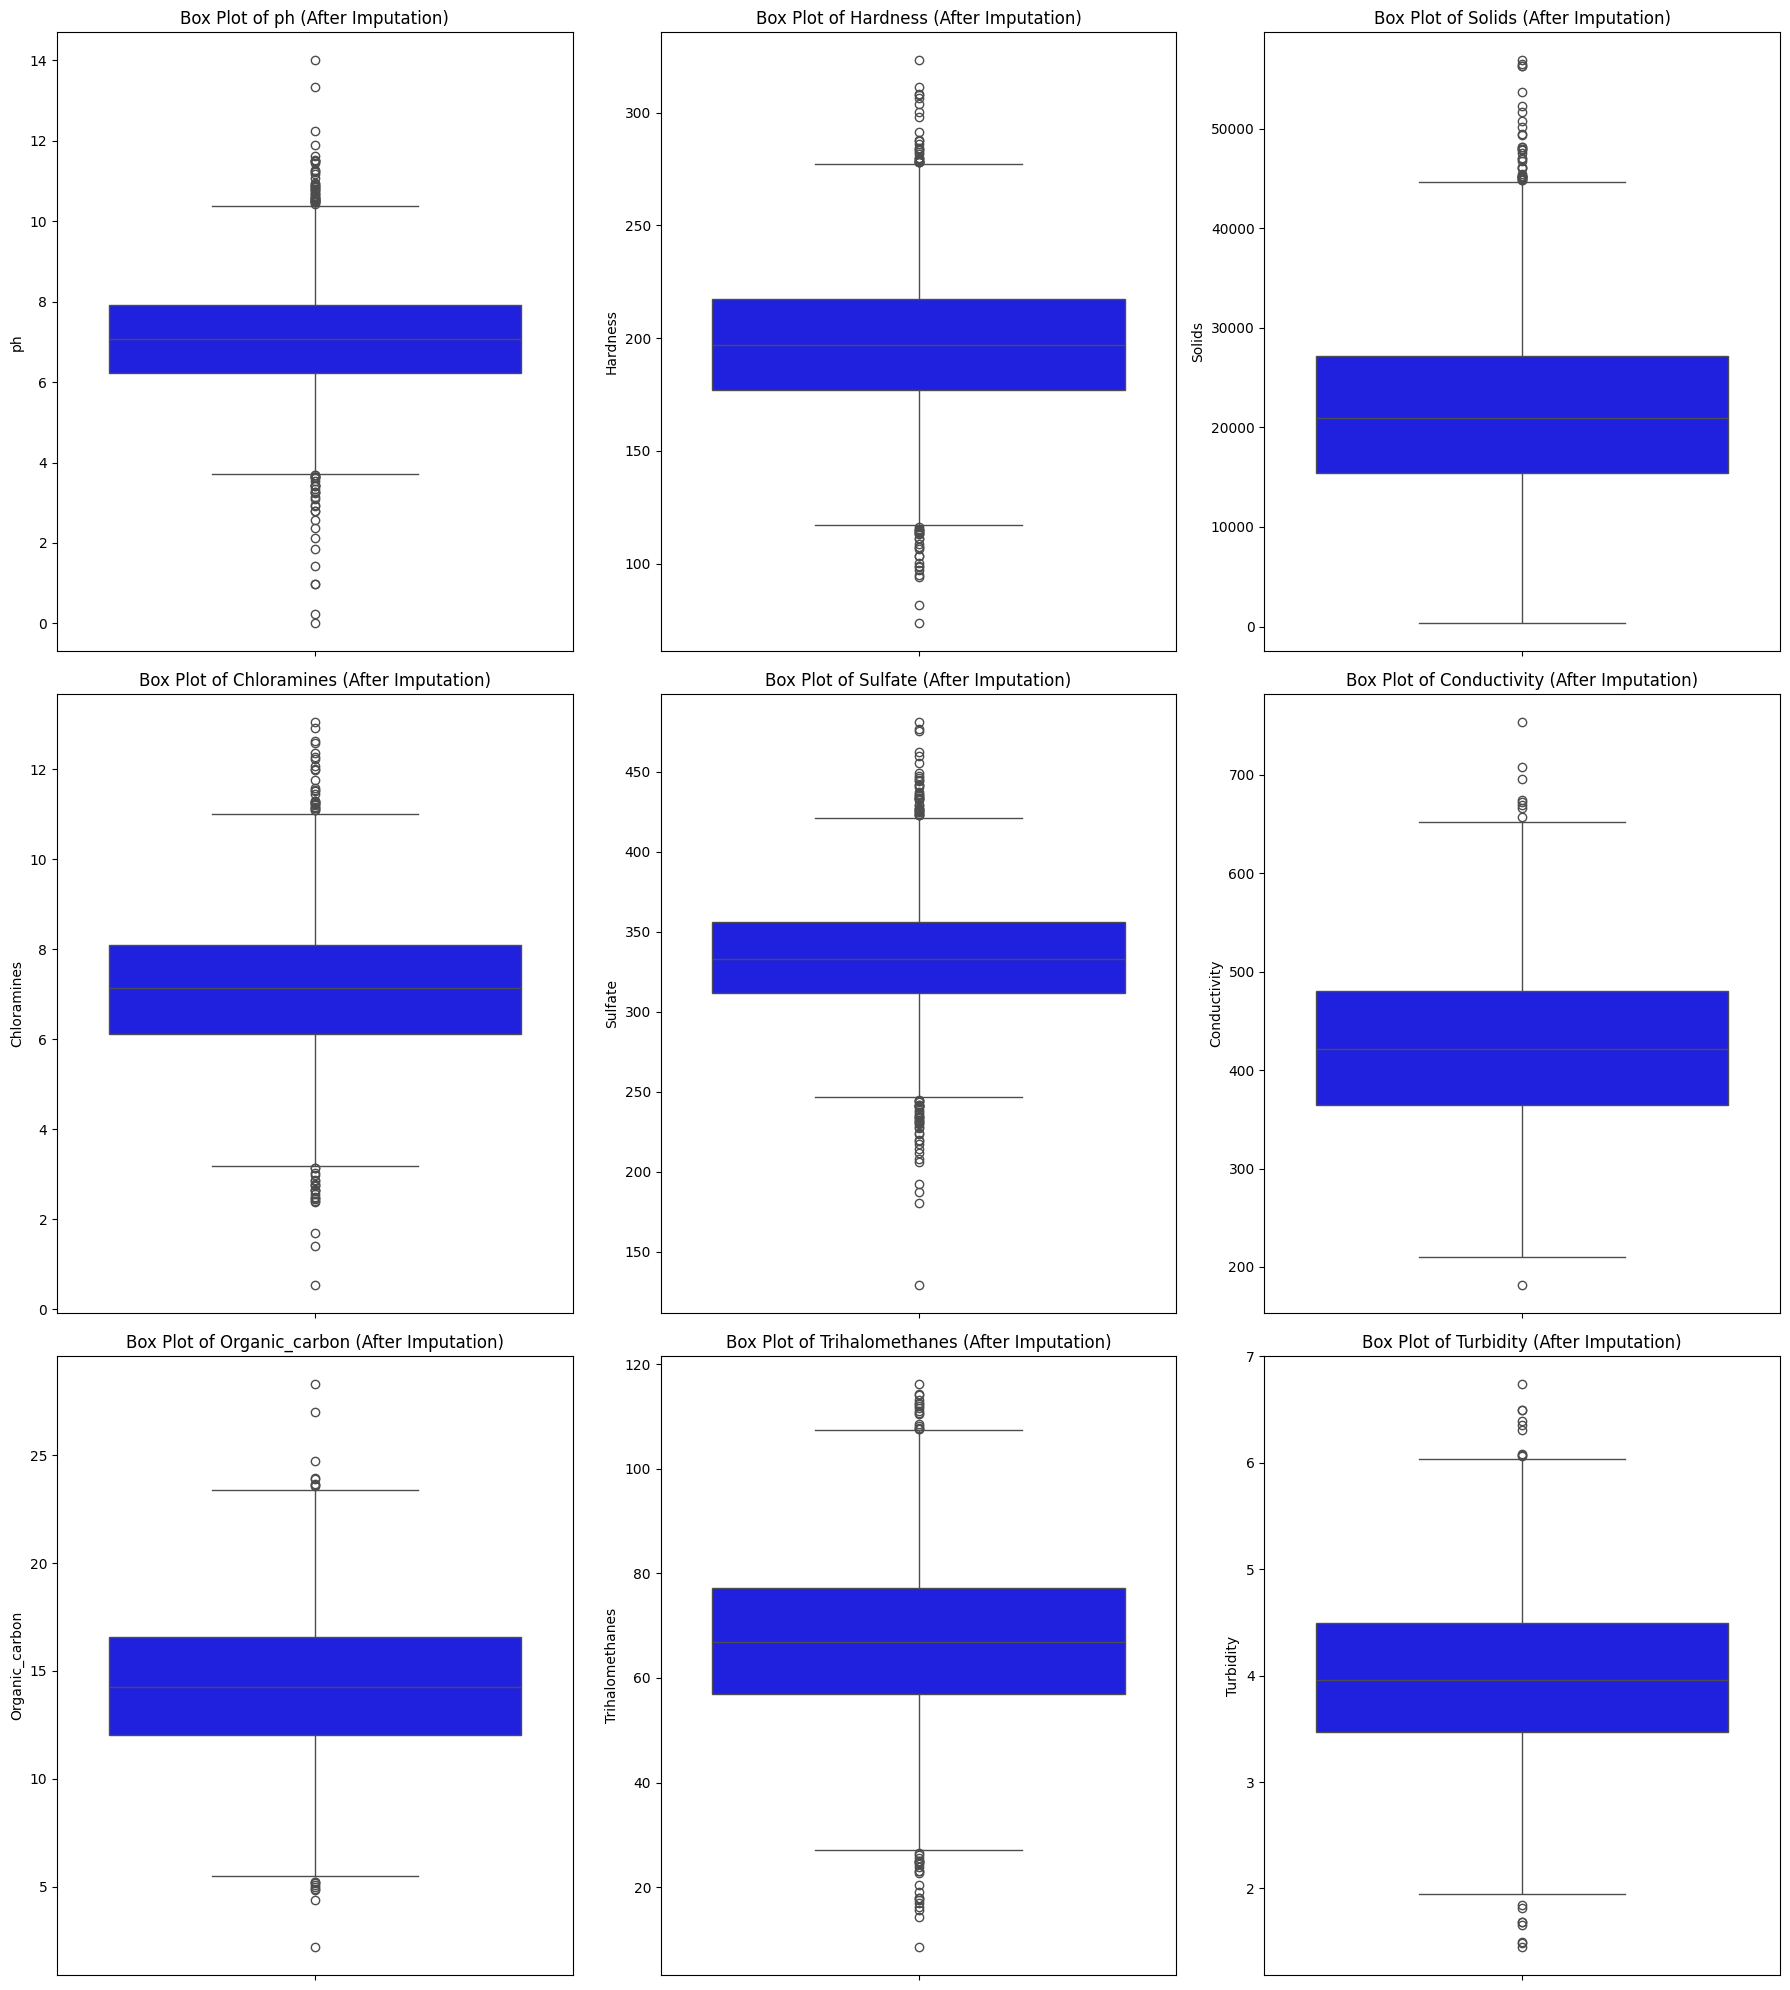

In [28]:
# Create box plots for each column after imputation (before capping)
plt.figure(figsize=(18, 20))

for i, col in enumerate(X_train_new.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=X_train_new[col], color='blue')
    plt.title(f'Box Plot of {col} (After Imputation)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7048\117915892.py:23: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\user\AppData\Local\Temp\ipykernel_7048\117915892.py:23: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\user\AppData\Local\Temp\ipykernel_7048\117915892.py:23: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\user\AppData\Local\Temp\ipykernel_7048\117915892.py:23: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\user\AppData\Local\Temp\ipykernel_7048\117915892.py:23: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\user\AppData\Local\Temp\ipykernel_7048\117915892.py:23: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.

C:\Users\user\AppData\Local\Temp\i

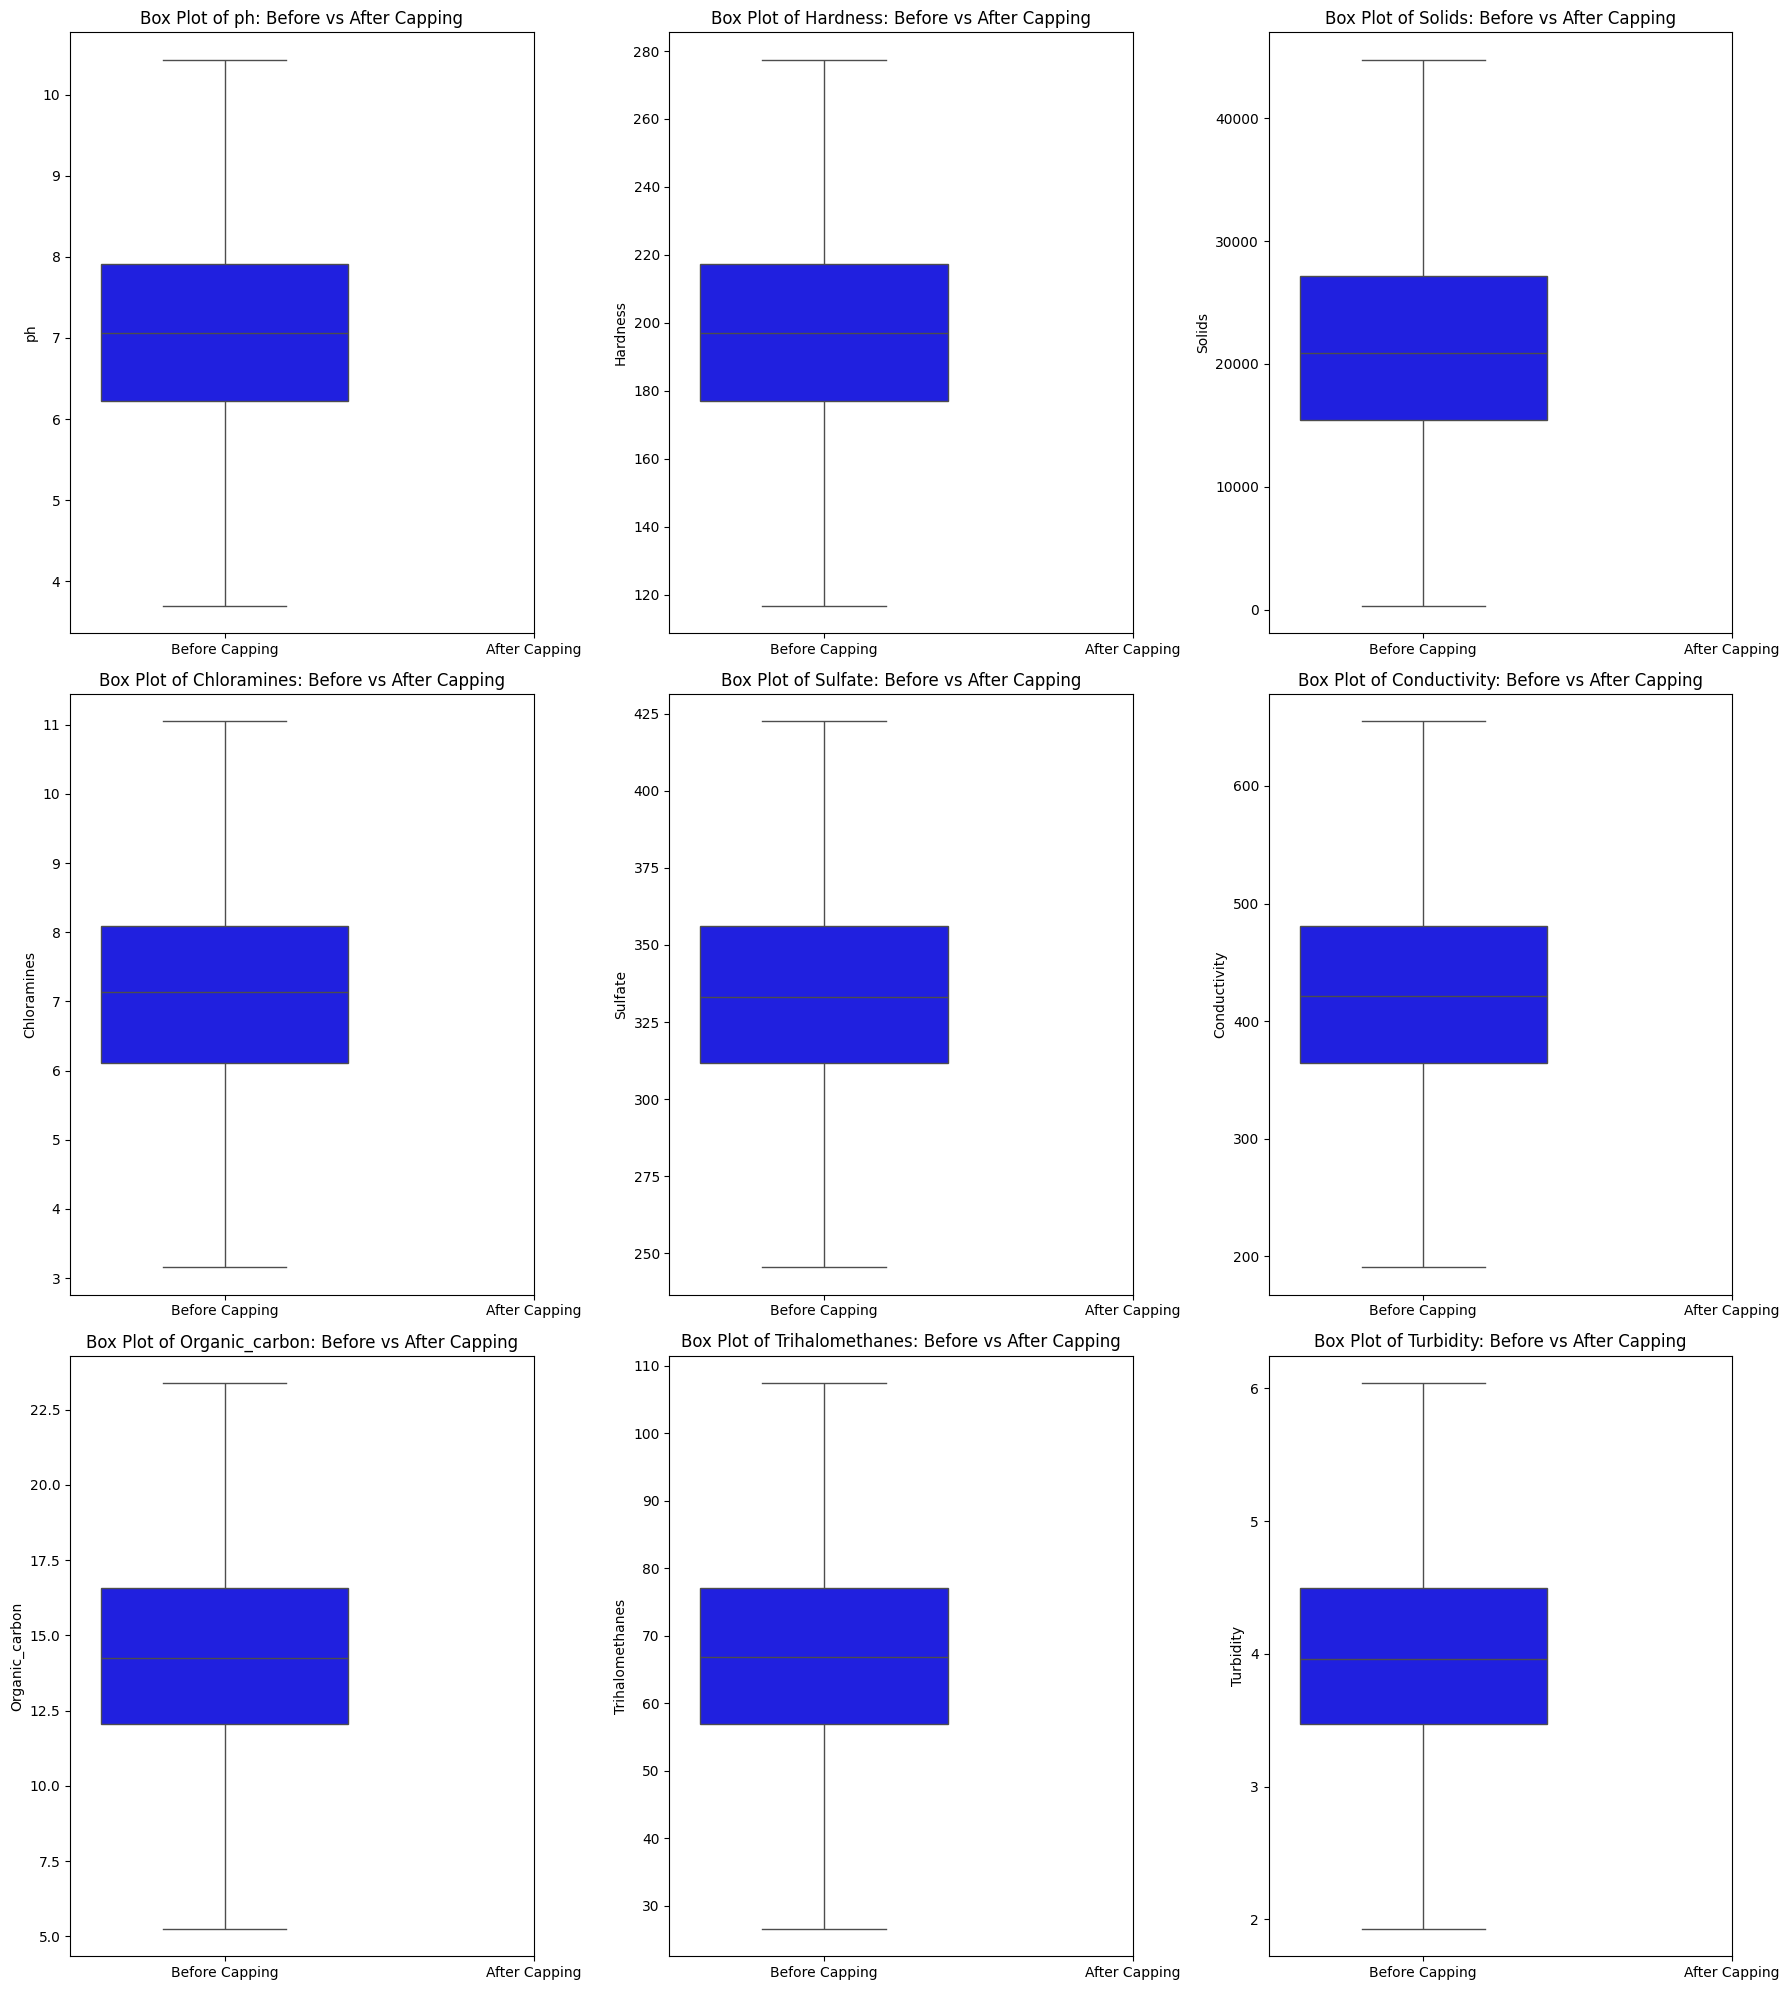

In [29]:
# to cap outliers using the IQR method -- acc to dist. should be used z score or percentile but from both some of the outliers werent goijg
def cap_outliers_iqr(df):
    capped_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        capped_df[col] = df[col].clip(lower_bound, upper_bound)

    return capped_df


X_train_capped = cap_outliers_iqr(X_train_new)


plt.figure(figsize=(18, 20))

for i, col in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=[X_train_new[col], X_train_capped[col]], palette=['blue', 'orange'])
    plt.xticks([0, 1], ['Before Capping', 'After Capping'])
    plt.title(f'Box Plot of {col}: Before vs After Capping')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [30]:
# summary statistics
def calculate_statistics(df):
    return {
        'mean': df.mean(),
        'median': df.median(),
        'std': df.std(),
        'min': df.min(),
        'max': df.max()
    }

# Calculate statistics before and after imputation
original_stats = calculate_statistics(X_train)  # Original data before imputation
imputed_stats = calculate_statistics(X_train_new)  # Data after imputation
capped_stats = calculate_statistics(X_train_capped)  # Data after capping outliers

# Create a DataFrame for comparison
stats_comparison = pd.DataFrame({
    'Original Mean': original_stats['mean'],
    'Imputed Mean': imputed_stats['mean'],
    'Capped Mean': capped_stats['mean'],
    'Original Median': original_stats['median'],
    'Imputed Median': imputed_stats['median'],
    'Capped Median': capped_stats['median'],
    'Original Std Dev': original_stats['std'],
    'Imputed Std Dev': imputed_stats['std'],
    'Capped Std Dev': capped_stats['std'],
    'Original Min': original_stats['min'],
    'Imputed Min': imputed_stats['min'],
    'Capped Min': capped_stats['min'],
    'Original Max': original_stats['max'],
    'Imputed Max': imputed_stats['max'],
    'Capped Max': capped_stats['max']
})

print("Summary Statistics Comparison (Original, Imputed, and Capped):")
print(stats_comparison)


Summary Statistics Comparison (Original, Imputed, and Capped):
                 Original Mean  Imputed Mean   Capped Mean  Original Median  \
ph                    7.082037      7.087716      7.088565         7.041594   
Hardness            196.766104    196.766104    196.753308       197.049965   
Solids            21888.972752  21888.972752  21834.497799     20922.154463   
Chloramines           7.129040      7.129040      7.127190         7.132154   
Sulfate             333.853540    333.699409    333.772262       333.271370   
Conductivity        425.608813    425.608813    425.500386       421.220228   
Organic_carbon       14.307714     14.307714     14.304929        14.243374   
Trihalomethanes      66.552600     66.564992     66.593720        66.762190   
Turbidity             3.977328      3.977328      3.977176         3.961731   

                 Imputed Median  Capped Median  Original Std Dev  \
ph                     7.066142       7.066142          1.581639   
Hardness  

In [31]:
X_train_capped.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.869527,215.997117,35971.025113,10.030508,330.858927,558.108549,14.337804,81.769775,2.934137
1,9.130796,200.032348,28273.603243,7.497526,297.687387,453.873571,12.860514,64.178494,3.025707
2,7.277144,194.880861,18270.105061,6.121931,344.879754,402.664582,15.459752,76.987232,4.931354
3,5.499489,230.308775,13902.968646,9.619575,352.084333,442.167006,14.740787,74.737555,5.846827
4,7.240092,214.737831,12666.005325,7.092691,302.491768,319.423051,15.433834,92.693936,5.005879
5,6.756991,209.766022,27382.769331,7.432312,323.955632,301.202885,13.970732,62.738594,4.103439
6,7.379564,207.391097,25110.037626,6.329791,345.592634,420.219104,22.346415,92.327760,2.739235
7,7.659140,193.167611,20894.400493,7.331568,359.426537,417.424766,16.787145,38.107005,3.818404
8,7.074303,215.966579,21852.437944,7.457515,283.755824,364.701095,11.383210,76.538803,5.076362
9,8.592418,228.676036,33013.479774,8.172356,328.886057,328.558440,17.128155,54.697300,3.701288


C:\Users\user\AppData\Local\Temp\ipykernel_7048\1566793263.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




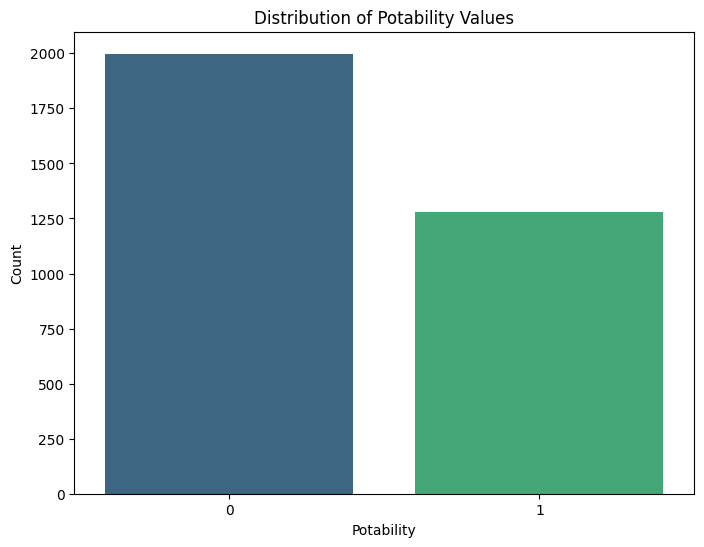

In [32]:

counts = Y.value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Distribution of Potability Values')

plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Cap outliers in the training and test data using the IQR method
X_train_capped = cap_outliers_iqr(X_train_new)
X_test_capped = cap_outliers_iqr(X_test_new)

# Step 1: Apply SMOTE to the training data after capping outliers
smote = SMOTE(random_state=0)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_capped, y_train)

# Check the distribution of the target after SMOTE
print("Resampled target distribution:", Counter(Y_train_resampled))

# Step 2: Scale the resampled training data and the capped test data
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform it
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the capped test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_capped)

# Convert numpy arrays back to DataFrames for easier readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_capped.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_capped.columns)

# Optionally, display the scaled data
print("Scaled and Resampled Training Data (First 5 Rows):")
print(X_train_scaled.head())
print("\nScaled Test Data (First 5 Rows):")
print(X_test_scaled.head())


Resampled target distribution: Counter({0: 1388, 1: 1388})
Scaled and Resampled Training Data (First 5 Rows):
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.159101  0.603016  1.627810     1.916484 -0.070157      1.671701   
1  1.505901  0.089214  0.730228     0.246527 -0.989164      0.359990   
2  0.141033 -0.076579 -0.436262    -0.660382  0.318286     -0.284433   
3 -1.167878  1.063615 -0.945506     1.645562  0.517887      0.212672   
4  0.113751  0.562488 -1.089746    -0.020374 -0.856060     -1.331959   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.006836         0.996649  -1.399124  
1       -0.455364        -0.150281  -1.275999  
2        0.357859         0.684833   1.286325  
3        0.132917         0.538157   2.517267  
4        0.349751         1.708892   1.386531  

Scaled Test Data (First 5 Rows):
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.755714  0.643868  1.885916     0.086055 -0.595125     -1.8

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# List of models -- dict
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting (XGBoost)": GradientBoostingClassifier(random_state=0),
    "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=0),
    "k-Nearest Neighbors (k-NN)": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=0)
}


for model_name, model in models.items():
    print(f"\nTraining {model_name}...")


    model.fit(X_train_scaled, Y_train_resampled)

    Y_pred = model.predict(X_test_scaled)

    print(f"Results for {model_name}:")
    print(classification_report(y_test, Y_pred, target_names=['Class 0', 'Class 1']))


    print("Confusion Matrix:")
    print(confusion_matrix(y_test, Y_pred))



Training Logistic Regression...
Results for Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.61      0.51      0.56       610
     Class 1       0.37      0.47      0.41       373

    accuracy                           0.50       983
   macro avg       0.49      0.49      0.49       983
weighted avg       0.52      0.50      0.50       983

Confusion Matrix:
[[313 297]
 [199 174]]

Training Random Forest...
Results for Random Forest:
              precision    recall  f1-score   support

     Class 0       0.69      0.73      0.71       610
     Class 1       0.51      0.47      0.49       373

    accuracy                           0.63       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.63      0.63       983

Confusion Matrix:
[[446 164]
 [199 174]]

Training Gradient Boosting (XGBoost)...
Results for Gradient Boosting (XGBoost):
              precision    recall  f1-score   support

     Cl

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Results for AdaBoost:
              precision    recall  f1-score   support

     Class 0       0.65      0.57      0.60       610
     Class 1       0.41      0.50      0.45       373

    accuracy                           0.54       983
   macro avg       0.53      0.53      0.53       983
weighted avg       0.56      0.54      0.55       983

Confusion Matrix:
[[345 265]
 [186 187]]


HYPERPARAMETERS FOR RANDOM 70 SE 71 :)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#model jiski tuning kr rhy
rf_model = RandomForestClassifier(random_state=0)

#paras. ?
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='precision', n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train_scaled, Y_train_resampled)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_

print("Best Parameters for Random Forest:", best_params_rf)

# Evaluate the model with the best parameters on test data
best_rf_model = grid_search_rf.best_estimator_
Y_pred_rf = best_rf_model.predict(X_test_scaled)

#  confusion matrix
print("Results with Best Random Forest Model:")
print(classification_report(y_test, Y_pred_rf, target_names=['Class 0', 'Class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred_rf))


Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score

Y_train_pred_rf = best_rf_model.predict(X_train_scaled)

print("Results on Training Data:")
print("Training Precision:", precision_score(Y_train_resampled, Y_train_pred_rf, pos_label=1))
print("Training Recall:", recall_score(Y_train_resampled, Y_train_pred_rf, pos_label=1))
print("Training F1 Score:", f1_score(Y_train_resampled, Y_train_pred_rf, pos_label=1))

print("\nResults on Test Data:")
print("Test Precision:", precision_score(y_test, Y_pred_rf, pos_label=1))
print("Test Recall:", recall_score(y_test, Y_pred_rf, pos_label=1))
print("Test F1 Score:", f1_score(y_test, Y_pred_rf, pos_label=1))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, Y_pred_rf, target_names=['Class 0', 'Class 1']))
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, Y_pred_rf))

# Compare the performance on training and test data
train_precision = precision_score(Y_train_resampled, Y_train_pred_rf, pos_label=1)
test_precision = precision_score(y_test, Y_pred_rf, pos_label=1)
print("\nTraining Precision:", train_precision)
print("Test Precision:", test_precision)


Results on Training Data:
Training Precision: 0.9776207302709069
Training Recall: 0.9171270718232044
Training F1 Score: 0.9464082098061574

Results on Test Data:
Test Precision: 0.5247252747252747
Test Recall: 0.5120643431635389
Test F1 Score: 0.5183175033921302

Classification Report for Test Data:
              precision    recall  f1-score   support

     Class 0       0.71      0.72      0.71       610
     Class 1       0.52      0.51      0.52       373

    accuracy                           0.64       983
   macro avg       0.62      0.61      0.61       983
weighted avg       0.64      0.64      0.64       983

Confusion Matrix for Test Data:
[[437 173]
 [182 191]]

Training Precision: 0.9776207302709069
Test Precision: 0.5247252747252747


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the model with initial parameters
rf_model = RandomForestClassifier(random_state=0)

# Define a more constrained parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Fewer trees
    'max_depth': [10, 20, 30],  # Constrain the depth of trees
    'min_samples_split': [2, 10, 20],  # Constrain node splits
    'min_samples_leaf': [1, 2, 4],  # Constrain leaf samples
    'max_features': ['sqrt', 'log2']  # Number of features for splits
}

# Initialize GridSearchCV with a focus on precision and cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='precision', n_jobs=-1, verbose=2)

# Fit the grid search on the scaled and resampled training data
grid_search_rf.fit(X_train_scaled, Y_train_resampled)

# Get the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Evaluate the model with the best parameters on test data
best_rf_model = grid_search_rf.best_estimator_
Y_pred_rf = best_rf_model.predict(X_test_scaled)

# Classification report and confusion matrix
print("Results with Best Random Forest Model:")
print(classification_report(y_test, Y_pred_rf, target_names=['Class 0', 'Class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred_rf))

# Evaluate the model on training data to check for overfitting
Y_train_pred_rf = best_rf_model.predict(X_train_scaled)
print("\nTraining Precision:", precision_score(Y_train_resampled, Y_train_pred_rf, pos_label=1))
print("Test Precision:", precision_score(y_test, Y_pred_rf, pos_label=1))


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}
Results with Best Random Forest Model:
              precision    recall  f1-score   support

     Class 0       0.70      0.70      0.70       610
     Class 1       0.51      0.51      0.51       373

    accuracy                           0.63       983
   macro avg       0.61      0.61      0.61       983
weighted avg       0.63      0.63      0.63       983

Confusion Matrix:
[[428 182]
 [183 190]]

Training Precision: 0.907673860911271
Test Precision: 0.510752688172043


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=0)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the trees
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='precision', n_jobs=-1, verbose=2)

# Fit the grid search on the scaled and resampled training data
grid_search_gb.fit(X_train_scaled, Y_train_resampled)

# Get the best parameters from the grid search
best_params_gb = grid_search_gb.best_params_

# Print the best parameters
print("Best Parameters for Gradient Boosting:", best_params_gb)

# Get the best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_

# Predict on the training data
Y_train_pred_gb = best_gb_model.predict(X_train_scaled)

# Predict on the test data
y_test_pred_gb = best_gb_model.predict(X_test_scaled)

# Calculate precision scores
train_precision = precision_score(Y_train_resampled, Y_train_pred_gb)
test_precision = precision_score(y_test, y_test_pred_gb)

# Print precision scores
print(f"Training Precision: {train_precision}")
print(f"Test Precision: {test_precision}")

# Classification report and confusion matrix
print("Results with Best Gradient Boosting Model:")
print(classification_report(y_test, y_test_pred_gb, target_names=['Class 0', 'Class 1']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [ ]:
import pickle

# Save the trained model to a file
with open('RFmodel.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)
